In [8]:
import pandas as pd
import numpy as np
from math import floor

## Q2.1.1

In [9]:
# read
df = pd.read_excel('Classification Iris.xlsx')

# initialize
train_ids = []
test_ids = []

# group by class
grouped = df.groupby('class')

for class_name, group in grouped:
    n_samples = len(group)
    n_train = floor(0.7 * n_samples)
    
    # 70% as training set
    train_ids.extend(group.iloc[:n_train]['instance_id'].tolist())
    
    # 30% as test set
    test_ids.extend(group.iloc[n_train:]['instance_id'].tolist())

print("Q2.2.1  Split training set and test set:")
print(f"Training set: {train_ids}")
print(f"Test set: {test_ids}")

Q2.2.1  Split training set and test set:
Training set: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
Test set: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


## Q2.1.2

In [10]:
train_data = []
test_data = []

for class_name, group in grouped:
    n_samples = len(group)
    n_train = floor(0.7 * n_samples)
    
    train_data.append(group.iloc[:n_train, 1:-1].values)  # feature columns
    test_data.append(group.iloc[n_train:, 1:-1].values)  # feature columns

X_train = np.vstack(train_data)
X_test = np.vstack(test_data)

# calculate mean
mu = np.mean(X_train, axis=0)
mu_test = np.mean(X_test, axis=0)

# calculate covariance matrix
cov_matrix_biased = np.dot((X_train - mu).T, (X_train - mu)) / X_train.shape[0]

# SVD decomposition
U, S, VT = np.linalg.svd(cov_matrix_biased)

# print
print("Q2.1.2 SVD decomposition:")
print(f"Mean vector: {mu}")
print(' ')
print(f"Covariance matrix: \n{cov_matrix_biased}")
print(' ')
print(f"Eigenvalues (vector): {S}")
print(' ')
print(f"Eigenvectors (matrix): \n{U}")


Q2.1.2 SVD decomposition:
Mean vector: [5.89047619 3.05809524 3.80571429 1.18666667]
 
Covariance matrix: 
[[ 0.71019501 -0.05001814  1.30319728  0.50244444]
 [-0.05001814  0.20719637 -0.3829034  -0.14170159]
 [ 1.30319728 -0.3829034   3.19901497  1.28779048]
 [ 0.50244444 -0.14170159  1.28779048  0.55791746]]
 
Eigenvalues (vector): [4.30938932 0.2677887  0.07822324 0.01892255]
 
Eigenvectors (matrix): 
[[-0.3612084  -0.67668874  0.5437191   0.34057361]
 [ 0.09667266 -0.71059308 -0.61616041 -0.32566581]
 [-0.86000139  0.16246182 -0.06924822 -0.47875719]
 [-0.34724702  0.10371103 -0.56561522  0.74077186]]


## Q2.1.3

In [11]:
# Step 4: get the projection matrix W with 1D subspace
W_1 = U[:, 0].reshape(-1, 1)  # get the largest eigenvector

# project to 1D subspace
X_train_centered = X_train - mu
X_train_mapped = X_train_centered.dot(W_1)  # z
X_train_reconstructed = X_train_mapped.dot(W_1.T) + mu  # x_new

# calculate variance and reconstruction loss
# variance_train = np.var(X_train_reconstructed)  # after debugging, we need to calculate the var by hand
variance_train = np.mean(np.linalg.norm(X_train_reconstructed - mu, axis=1)**2)

# calculate reconstruction loss
reconstruction_loss_train = np.mean(np.linalg.norm(X_train - X_train_reconstructed, axis=1)**2)

# project test set
X_test_centered = X_test - mu_test
X_test_mapped = X_test_centered.dot(W_1)
X_test_reconstructed = X_test_mapped.dot(W_1.T) + mu_test

# calculate variance and reconstruction loss
# variance_test = np.var(X_test_reconstructed)
variance_test = np.mean(np.linalg.norm(X_test_reconstructed - mu_test, axis=1)**2)
reconstruction_loss_test = np.mean(np.linalg.norm(X_test - X_test_reconstructed, axis=1)**2)

# print
print("Q2.1.3 Project onto 1-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{W_1}")
print(' ')
print(f"shape of X_train_mapped: {X_train_mapped.T.shape}, shape of X_train_reconstruct: {X_train_reconstructed.T.shape}")  # Here we take transpose to be aligned with the slides
print(f"variance_train: {variance_train}")
print(f"reconstruction_loss_train: {reconstruction_loss_train}")
print(' ')
print(f"shape of X_test_mapped: {X_test_mapped.T.shape}, shape of X_test_reconstruct: {X_test_reconstructed.T.shape}")
print(f"variance_test: {variance_test}")
print(f"reconstruction_loss_test: {reconstruction_loss_test}")


Q2.1.3 Project onto 1-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084 ]
 [ 0.09667266]
 [-0.86000139]
 [-0.34724702]]
 
shape of X_train_mapped: (1, 105), shape of X_train_reconstruct: (4, 105)
variance_train: 4.30938931924709
reconstruction_loss_train: 0.3649344902767157
 
shape of X_test_mapped: (1, 45), shape of X_test_reconstruct: (4, 45)
variance_test: 3.907084095695325
reconstruction_loss_test: 0.27983936109479424


## Q2.1.4

In [12]:
# Step 4: get the projection matrix W with 2D subspace
W_2 = U[:, :2]  # get the first two eigenvectors

# project to 2D subspace
X_train_centered = X_train - mu
X_train_mapped_2d = X_train_centered.dot(W_2)
X_train_reconstructed_2d = X_train_mapped_2d.dot(W_2.T) + mu

# calculate variance and reconstruction loss
# variance_train_2d = np.var(X_train_reconstructed_2d)
variance_train_2d = np.mean(np.linalg.norm(X_train_reconstructed_2d - mu, axis=1)**2)

# calculate reconstruction loss
reconstruction_loss_train_2d = np.mean(np.linalg.norm(X_train - X_train_reconstructed_2d, axis=1)**2)

# project test set
X_test_centered = X_test - mu_test
X_test_mapped_2d = X_test_centered.dot(W_2)
X_test_reconstructed_2d = X_test_mapped_2d.dot(W_2.T) + mu_test

# calculate variance and reconstruction loss
# variance_test_2d = np.var(X_test_reconstructed_2d)
variance_test_2d = np.mean(np.linalg.norm(X_test_reconstructed_2d - mu_test, axis=1)**2)
reconstruction_loss_test_2d = np.mean(np.linalg.norm(X_test - X_test_reconstructed_2d, axis=1)**2)

# print
print("Q2.1.4 Project onto 2-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{W_2}")
print(' ')
print(f"shape of X_train_mapped: {X_train_mapped_2d.T.shape}, shape of X_train_reconstruct: {X_train_reconstructed_2d.T.shape}")
print(f"variance_train: {variance_train_2d}")
print(f"reconstruction_loss_train: {reconstruction_loss_train_2d}")
print(' ')
print(f"shape of X_test_mapped: {X_test_mapped_2d.T.shape}, shape of X_test_reconstruct: {X_test_reconstructed_2d.T.shape}")
print(f"variance_test: {variance_test_2d}")
print(f"reconstruction_loss_test: {reconstruction_loss_test_2d}")


Q2.1.4 Project onto 2-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084  -0.67668874]
 [ 0.09667266 -0.71059308]
 [-0.86000139  0.16246182]
 [-0.34724702  0.10371103]]
 
shape of X_train_mapped: (2, 105), shape of X_train_reconstruct: (4, 105)
variance_train: 4.577178016423878
reconstruction_loss_train: 0.09714579309992512
 
shape of X_test_mapped: (2, 45), shape of X_test_reconstruct: (4, 45)
variance_test: 4.078378031615007
reconstruction_loss_test: 0.10854542517511108


## Q2.1.5

In [13]:
# Step 5: get the projection matrix W with 3D subspace
W_3 = U[:, :3]  # get the first three eigenvectors

# project to 3D subspace
X_train_centered = X_train - mu
X_train_mapped_3d = X_train_centered.dot(W_3)
X_train_reconstructed_3d = X_train_mapped_3d.dot(W_3.T) + mu

# calculate variance and reconstruction loss
# variance_train_3d = np.var(X_train_reconstructed_3d)
variance_train_3d = np.mean(np.linalg.norm(X_train_reconstructed_3d - mu, axis=1)**2)

# calculate reconstruction loss
reconstruction_loss_train_3d = np.mean(np.linalg.norm(X_train - X_train_reconstructed_3d, axis=1)**2)

# project test set
X_test_centered = X_test - mu_test
X_test_mapped_3d = X_test_centered.dot(W_3)
X_test_reconstructed_3d = X_test_mapped_3d.dot(W_3.T) + mu_test

# calculate variance and reconstruction loss
# variance_test_3d = np.var(X_test_reconstructed_3d)
variance_test_3d = np.mean(np.linalg.norm(X_test_reconstructed_3d - mu_test, axis=1)**2)
reconstruction_loss_test_3d = np.mean(np.linalg.norm(X_test - X_test_reconstructed_3d, axis=1)**2)

# print
print("Q2.1.5 Project onto 3-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{W_3}")
print(' ')
print(f"shape of X_train_mapped: {X_train_mapped_3d.T.shape}, shape of X_train_reconstruct: {X_train_reconstructed_3d.T.shape}")
print(f"variance_train: {variance_train_3d}")
print(f"reconstruction_loss_train: {reconstruction_loss_train_3d}")
print(' ')
print(f"shape of X_test_mapped: {X_test_mapped_3d.T.shape}, shape of X_test_reconstruct: {X_test_reconstructed_3d.T.shape}")
print(f"variance_test: {variance_test_3d}")
print(f"reconstruction_loss_test: {reconstruction_loss_test_3d}")


Q2.1.5 Project onto 3-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084  -0.67668874  0.5437191 ]
 [ 0.09667266 -0.71059308 -0.61616041]
 [-0.86000139  0.16246182 -0.06924822]
 [-0.34724702  0.10371103 -0.56561522]]
 
shape of X_train_mapped: (3, 105), shape of X_train_reconstruct: (4, 105)
variance_train: 4.655401260550285
reconstruction_loss_train: 0.018922548973519977
 
shape of X_test_mapped: (3, 45), shape of X_test_reconstruct: (4, 45)
variance_test: 4.154147325738936
reconstruction_loss_test: 0.032776131051182336


## Q2.1.6

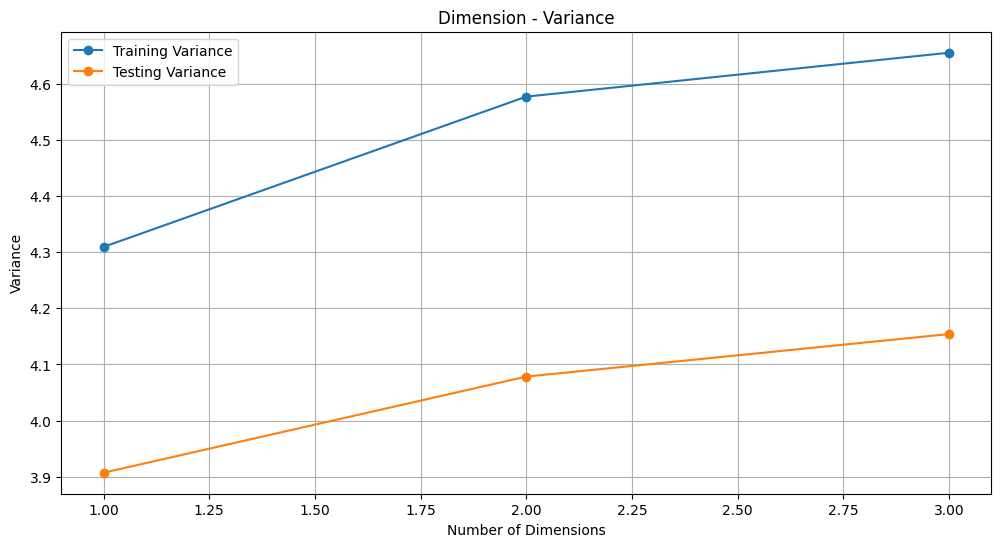

As the number of dimensions increases, both the training and test set variances increase.
Training variance is higher than test variance, reflecting the fact that the PCA model better captures variance in the training data. Test variance increases with higher dimensions, but remains lower than training variance.
Variance growth rate: The increase in variance from 1D to 2D is faster than from 2D to 3D, indicating that the first two principal components explain most of the variance, while the third component contributes less.



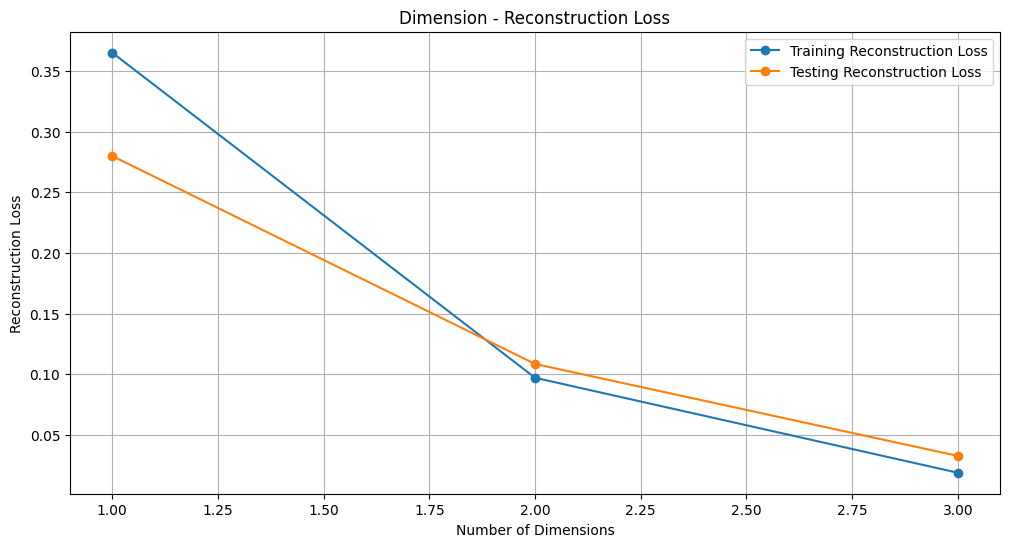

Both training and test set reconstruction losses decrease as dimensions increase. Before around 1.85 dimensions, the training loss is higher than the test loss, but after 1.85 dimensions, the test loss becomes higher. The loss reduction is faster before 2D than after, indicating that the first two dimensions contribute most to improving reconstruction accuracy.


In [14]:
import matplotlib.pyplot as plt

# dimension and var
dimensions = [1, 2, 3]
variance_train_values = [variance_train, variance_train_2d, variance_train_3d]
variance_test_values = [variance_test, variance_test_2d, variance_test_3d]

# var
plt.figure(figsize=(12, 6))
plt.plot(dimensions, variance_train_values, label='Training Variance', marker='o')
plt.plot(dimensions, variance_test_values, label='Testing Variance', marker='o')
plt.title('Dimension - Variance')
plt.xlabel('Number of Dimensions')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

print("As the number of dimensions increases, both the training and test set variances increase.")
print('Training variance is higher than test variance, reflecting the fact that the PCA model better captures variance in the training data. Test variance increases with higher dimensions, but remains lower than training variance.')
print('Variance growth rate: The increase in variance from 1D to 2D is faster than from 2D to 3D, indicating that the first two principal components explain most of the variance, while the third component contributes less.')
print()

# dimension and recosntruction loss
reconstruction_loss_train_values = [reconstruction_loss_train, reconstruction_loss_train_2d, reconstruction_loss_train_3d]
reconstruction_loss_test_values = [reconstruction_loss_test, reconstruction_loss_test_2d, reconstruction_loss_test_3d]

# reconstruction loss
plt.figure(figsize=(12, 6))
plt.plot(dimensions, reconstruction_loss_train_values, label='Training Reconstruction Loss', marker='o')
plt.plot(dimensions, reconstruction_loss_test_values, label='Testing Reconstruction Loss', marker='o')
plt.title('Dimension - Reconstruction Loss')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Loss')
plt.legend()
plt.grid(True)
plt.show()

print('Both training and test set reconstruction losses decrease as dimensions increase. Before around 1.85 dimensions, the training loss is higher than the test loss, but after 1.85 dimensions, the test loss becomes higher. The loss reduction is faster before 2D than after, indicating that the first two dimensions contribute most to improving reconstruction accuracy.')


## 2.2.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data_all = pd.read_csv('abalone.data', header=None, names=column_names)

# Print DataFrame info
print(data_all.info())
print()
print(data_all)

# Perform one-hot encoding on 'Sex' column
data_all = pd.get_dummies(data_all, columns=['Sex'])
data_all['Sex_F'] = data_all['Sex_F'].astype(int)
data_all['Sex_I'] = data_all['Sex_I'].astype(int)
data_all['Sex_M'] = data_all['Sex_M'].astype(int)

from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (excluding 'Rings')
numerical_columns = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']
scaler = MinMaxScaler()

# Apply Min-Max scaling
data_all[numerical_columns] = scaler.fit_transform(data_all[numerical_columns])

# Create a new column 'Age' and remove 'Rings'
data_all['Age(yrs)'] = data_all['Rings'] + 1.5
data_all.drop(columns=['Rings'], inplace=True)

# Select numerical columns
numerical_cols = data_all.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot frequency distribution for all numerical columns
for col in numerical_cols:
    # create a new figure
    plt.figure(figsize=(10, 6))

    # plot the histogram
    plt.hist(data_all[col], bins=50, edgecolor='black', alpha=0.7)

    # title and labels
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # show the plot
    plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering (exclude 'Age' which is the target variable)
X = data_all.drop(columns=['Age(yrs)'])

# Construct KMeans model with k = 5
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)

# Print cluster centers and labels
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("Labels for Data Points:")
print(kmeans.labels_)


In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Coefficient: {sil_score}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
from numpy.linalg import inv, det

data = data_all['WholeWeight'].to_numpy()

class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)


class GaussianMixture_self:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        #todo the Algorithm would be numerical enhanced by normalizing the data first, next do all the EM steps and do the de-normalising at the end
        
        #init with multiple gaussians
        self.one = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        self.two = Gaussian(uniform(mu_min, mu_max), 
                            uniform(sigma_min, sigma_max))
        
        #as well as how much to mix them
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:  
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)
            # compute denominator
            den = wp1 + wp2
            # normalize
            wp1 /= den   
            wp2 /= den     # wp1+wp2= 1, it either belongs to gaussian 1 or gaussion 2
            # add into loglike
            self.loglike += log(den) #freshening up self.loglike in the process
            # yield weight tuple
            yield (wp1, wp2)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, rigt) = zip(*weights) 
        one_den = sum(left)
        two_den = sum(rigt)

        # compute new means
        self.one.mu = sum(w * d  for (w, d) in zip(left, data)) / one_den
        self.two.mu = sum(w * d  for (w, d) in zip(rigt, data)) / two_den
        
        # compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_den)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(rigt, data)) / two_den)
        # compute new mix
        self.mix = one_den / len(data)

        
    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep()) #The heart of the algorith, perform E-stepand next M-step
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)
        
    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)


# See the algorithm in action
n_iterations = 20
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture_self(data)
for _ in range(n_iterations):
    try:
        #train!
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        print("one less")
        pass

In [ ]:
# Find best Mixture Gaussian model
n_iterations = 20
n_random_restarts = 4
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture_self(data)
    for _ in range(n_iterations):
        try:
            mix.iterate()
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#print('Best Gaussian Mixture : μ = {:.2}, σ = {:.2} with μ = {:.2}, σ = {:.2}'.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))

# print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
# print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_mix.one.mu, best_mix.one.sigma, best_mix.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_mix.two.mu, best_mix.two.sigma, (1-best_mix.mix)))

#Show mixture
sns.histplot(data, bins=20, kde=False, stat="density")
x = np.linspace(min(data), max(data), 1000)

# calculate the gaussian mixture
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='Gaussian Mixture')

# calculate the individual gaussians 1
g_left = [best_mix.one.pdf(e) * best_mix.mix for e in x]
plt.plot(x, g_left, label='Gaussian One')

# calculate the individual gaussians 2
g_right = [best_mix.two.pdf(e) * (1 - best_mix.mix) for e in x]
plt.plot(x, g_right, label='Gaussian Two')

plt.legend()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

# abstract 'WholeWeight' column
whole_weight = data_all['WholeWeight'].to_numpy().reshape(-1, 1)

# use GaussianMixture to fit the data
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(whole_weight)

# initial Gaussian_nr
Gaussian_nr = 0

# draw the PDF of each Gaussian component
for mu, cov, p in zip(gmm.means_.flatten(), gmm.covariances_.flatten(), gmm.weights_):
    # calculate the standard deviation and the variance
    sd = np.sqrt(cov)
    print(f'Gaussian {Gaussian_nr}: μ = {mu:.2f}, σ = {sd:.2f}, weight = {p:.2f}')
    
    # calculate the PDF
    g_s = stats.norm(mu, sd).pdf(x) * p  # standard normal distribution
    plt.plot(x, g_s, label=f'Gaussian {Gaussian_nr} (sklearn)')
    Gaussian_nr += 1

# plot the data
sns.histplot(data, bins=20, kde=False, stat="density", color='gray', label='Data', alpha=0.5)

# calculate the Gaussian Mixture
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])  # GMM 给出的是对数概率，使用 exp() 转换为原始概率
plt.plot(x, gmm_sum, label='Gaussian Mixture', color='red')

plt.legend()
plt.show()

# get the labels
labels = gmm.predict(whole_weight)

# calculate the silhouette score
sil_score_WholeWeight = silhouette_score(whole_weight, labels)


In [ ]:
from sklearn.mixture import GaussianMixture

# abstract all columns
X = data_all.values

# use GaussianMixture to fit the data
gmm_all_features = GaussianMixture(n_components=2, covariance_type='full', tol = 1e-5)
gmm_all_features.fit(X)


# print the parameters of each Gaussian component
for i, (mu, cov, weight) in enumerate(zip(gmm_all_features.means_, gmm_all_features.covariances_, gmm_all_features.weights_)):
    print(f'Gaussian {i+1}:')
    print(f'  Mean (μ): {mu}')
    print(f'  Covariance (Σ): \n{cov}')
    print(f'  Weight (π): {weight:.3f}')
    print('-' * 40)

print(f"Silhouette Coefficient for GMM model: {sil_score_WholeWeight:.4f}")